<a href="https://colab.research.google.com/github/Kevin11CG/Speech-Processing/blob/main/Speech_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
### Libraries for pandas dataframe
import pandas as pd
import os
import re

### Libraries for all text processing
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')
from collections import Counter
from string import punctuation

### Libraries to plot data
import seaborn as sns
from matplotlib import pyplot as plt

### Library to generate the wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
### Mounting the directory to drive
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Text Mining Course/LABS_TextAnalytics/'

### File names from the mounted drive
biden_file = 'Joe_Biden_Speech_9_Sept_2021.txt'
bolsonaro_file = 'Jair_Bolsonaro_Speech_21_Sept_2021.txt'
putin_file = 'Vladmir_Putin_Speech_5_Jan_2021.txt'

Mounted at /content/drive


In [3]:
### Creates primary pandas dataframe from the file name
def TextDataframe (filename_In):
  with open(os.path.join(data_dir, filename_In)) as file:
      doc = []
      for line in file:
        doc.append(line)
  df = pd.Series(doc)
  return df

### Turns the dataframe into string
def DFtoString(df_In):
  df_string = ''
  for line in df_In:
    line = str(line).strip()
    df_string += line + ' '
  return df_string

### Takes text and language to return list of tokens
def GetTokens(text_In, language_In):
  lemmatizer = WordNetLemmatizer()
  tokens = word_tokenize(text_In, language=language_In)
  tokens = [t.lower() for t in tokens]
  tokens = [t for t in tokens if t not in stopwords.words(language_In)]
  tokens = [t for t in tokens if t.isalpha()]
  tokens = [lemmatizer.lemmatize(t) for t in tokens]
  return tokens

### Takes list of tokens and return frequency pds for words, ngrams, and trigrams
def WordFrequency(tokens_In):
  # Count words(pairs and trigrams)
  count = Counter(tokens_In)
  count_2 = Counter(ngrams(tokens_In, 2))
  count_3 = Counter(ngrams(tokens_In, 3))
  # Create 3 data frame(s) and return them
  word_freq = pd.DataFrame(count.items(),columns = ['Word', 'Frequency']).sort_values(by = 'Frequency', ascending = False)
  word_pairs = pd.DataFrame(count_2.items(),columns = ['Pairs', 'Frequency']).sort_values(by = 'Frequency', ascending = False)
  trigrams = pd.DataFrame(count_3.items(),columns = ['Trigrams', 'Frequency']).sort_values(by = 'Frequency', ascending = False)
  # Return list of the three dataframes
  return [word_freq, word_pairs, trigrams]

### Creates frequnecy table from one of the three dataframes
def WordFrequencyTable (df_In):
  plt.figure(figsize = (15, 11.5))
  columns = list(df_In.columns)
  sns.barplot(x = columns[1], y = columns[0], data = df_In.head(20))
  plt.show()

### Takes text and language to generate wordcloud
def GenerateWordcloud(text_In, language_In):
  # Create the wordcloud and store it into a variable
  wordcloud = WordCloud(width = 800, height = 800,
            background_color ='black',
            stopwords = stopwords.words(language_In),
            min_font_size = 10).generate(' '.join([token.lower() for token in word_tokenize(text_In)]))
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

### Takes text and its corresponding language to summarize it
def TextSummarizer(text_In, language_In):
  # Tokenize inputted text with the inputted language
  text = text_In
  words = word_tokenize(text, language=language_In)

  # Create a frequency table
  freq_table = dict()
  for word in words:
    word = word.lower()
    if word in stopwords.words(language_In):
        continue
    if word in freq_table:
        freq_table[word] += 1
    else:
        freq_table[word] = 1

  # Tokenize the text into individual sentences and score each sentence
  sentences = sent_tokenize(text, language=language_In)
  sentence_value = dict()
  for sentence in sentences:
    for word, freq in freq_table.items():
      if word in sentence.lower():
        if sentence in sentence_value:
          sentence_value[sentence] += freq
        else:
          sentence_value[sentence] = freq

  sum_values = 0
  for sentence in sentence_value:
    sum_values += sentence_value[sentence]

  # Average the value of a sentence from the original text
  average = int(sum_values / len(sentence_value))

  # Store the sentences into the summary then returns it
  summary = ''
  for sentence in sentences:
    if (sentence in sentence_value) and (sentence_value[sentence] > (1.2 * average)):
        summary += sentence + ' '
  return summary

In [4]:
### Creating the pandas dataframe
biden_df = TextDataframe(biden_file)
bolsonaro_df = TextDataframe(bolsonaro_file)
putin_df = TextDataframe(putin_file)

In [5]:
### Turning the dataframes into strings
biden_str = DFtoString(biden_df)
bolsonaro_str = DFtoString(bolsonaro_df)
putin_str = DFtoString(putin_df)

In [8]:
### Forming the lemmatized tokens
biden_tokens = GetTokens(biden_str, 'english')
print(biden_tokens)
bolsonaro_tokens = GetTokens(bolsonaro_str, 'portuguese')
print(bolsonaro_tokens)
putin_tokens = GetTokens(putin_str, 'russian')
print(putin_tokens)

['good', 'evening', 'fellow', 'american', 'want', 'talk', 'battle', 'progress', 'made', 'work', 'left', 'start', 'understanding', 'even', 'delta', 'variant', 'sic', 'hitting', 'country', 'hard', 'tool', 'combat', 'virus', 'come', 'together', 'country', 'use', 'tool', 'raise', 'vaccination', 'rate', 'protect', 'others', 'masking', 'expanded', 'testing', 'identify', 'people', 'infected', 'turn', 'tide', 'take', 'lot', 'hard', 'work', 'going', 'take', 'time', 'many', 'u', 'frustrated', 'nearly', 'million', 'american', 'still', 'vaccinated', 'even', 'though', 'vaccine', 'safe', 'effective', 'free', 'might', 'confused', 'true', 'false', 'outline', 'new', 'step', 'fight', 'going', 'announcing', 'tonight', 'let', 'give', 'clear', 'information', 'stand', 'first', 'made', 'considerable', 'progress', 'battling', 'became', 'president', 'million', 'american', 'fully', 'vaccinated', 'today', 'million', 'american', 'protection', 'took', 'office', 'ordered', 'enough', 'vaccine', 'every', 'american', 

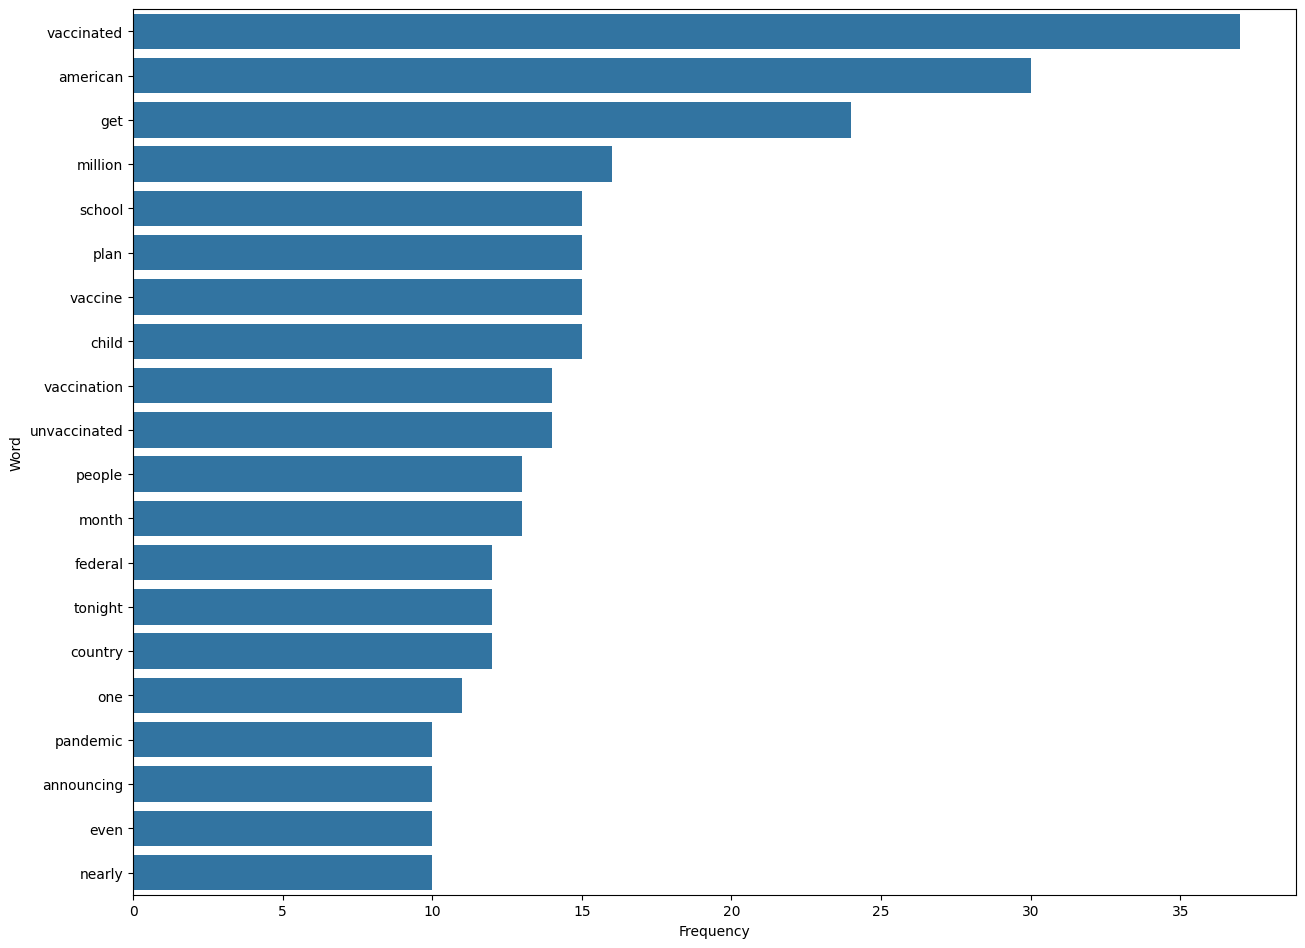

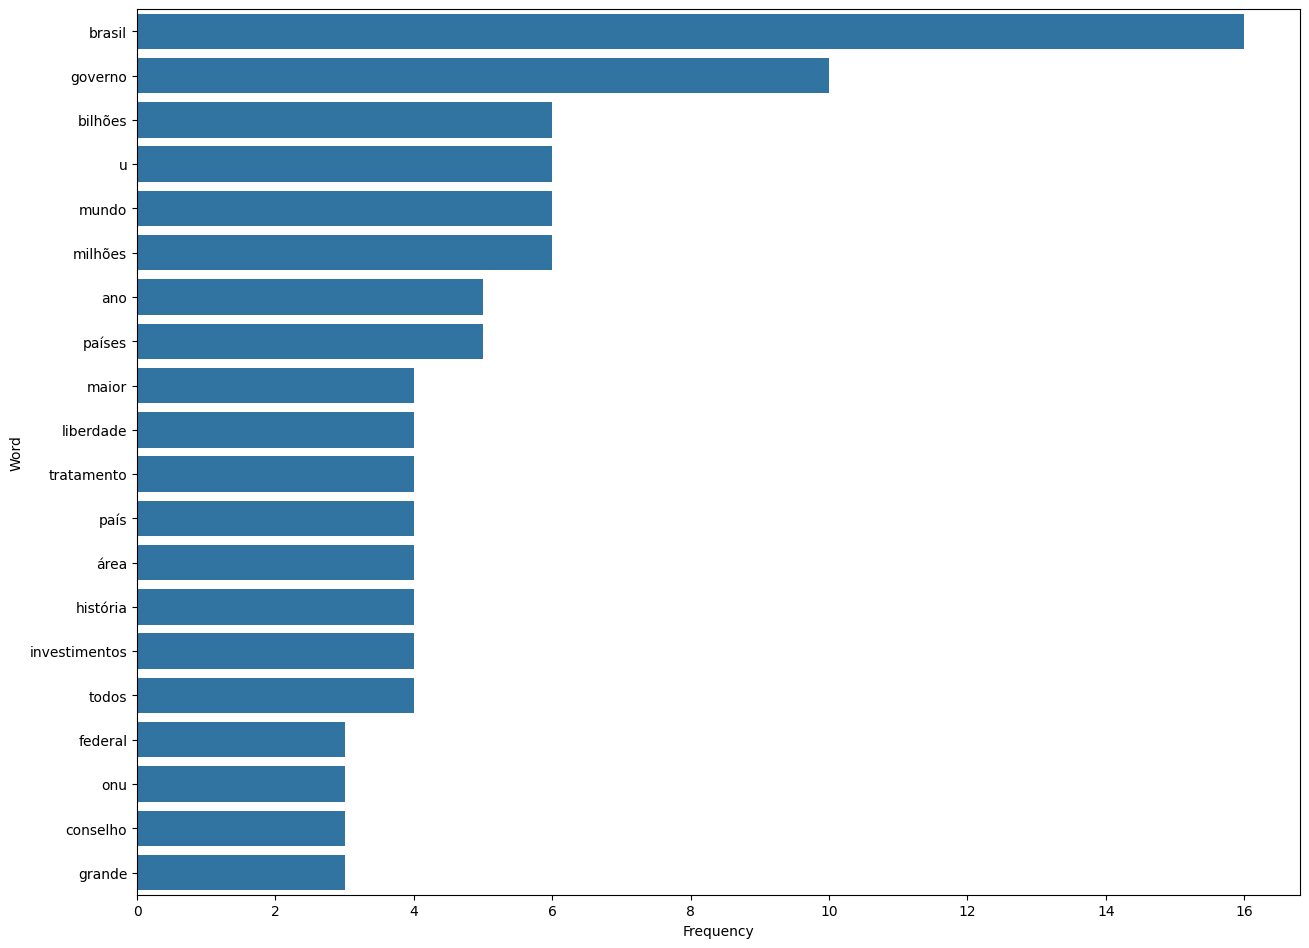

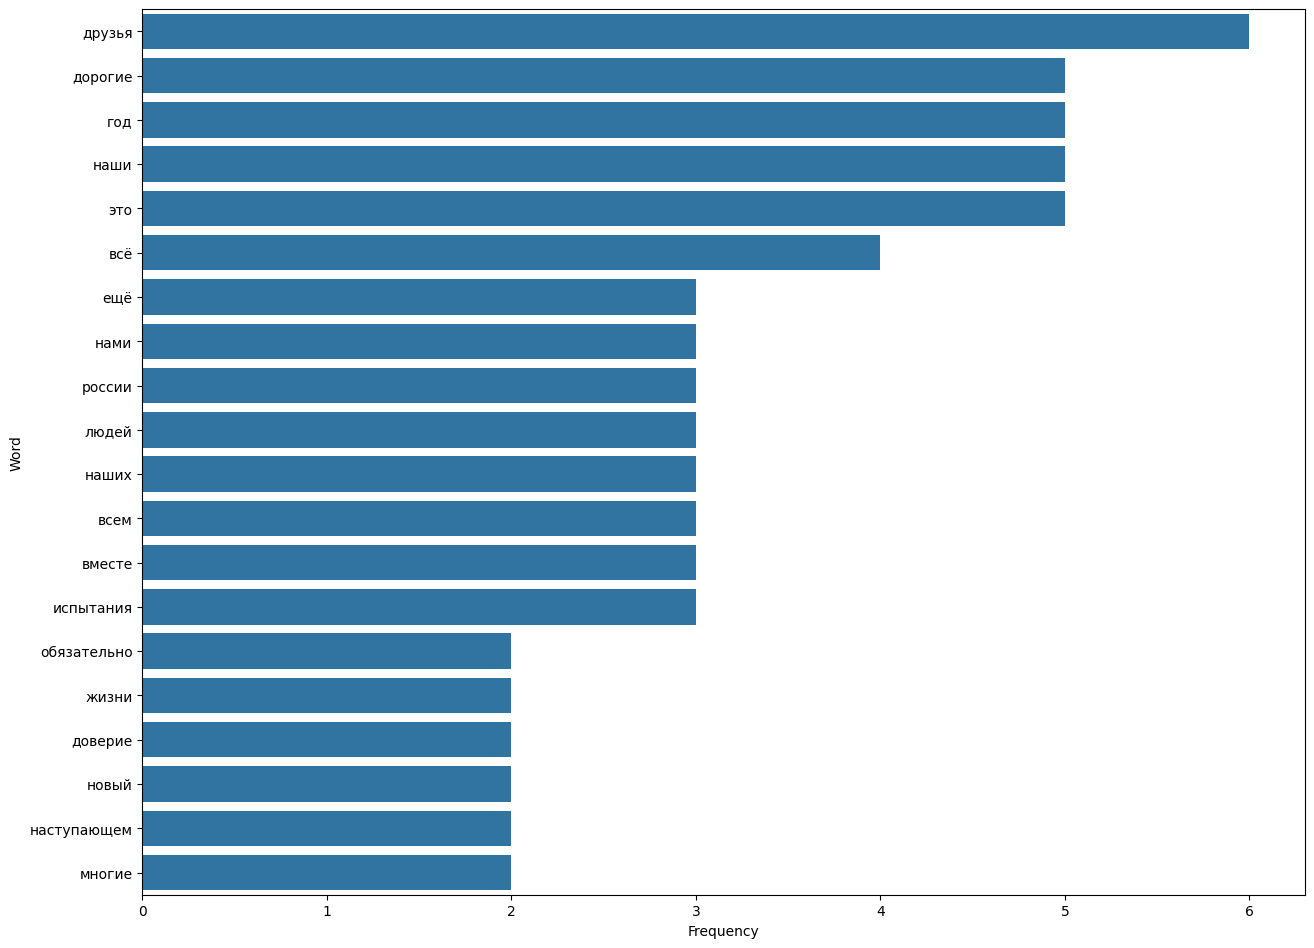

In [ ]:
### Forming the graphs for word frequencies
biden_word_freqs = WordFrequency(biden_tokens)
WordFrequencyTable(biden_word_freqs[0])
bolsonaro_word_freqs = WordFrequency(bolsonaro_tokens)
WordFrequencyTable(bolsonaro_word_freqs[0])
putin_word_freqs = WordFrequency(putin_tokens)
WordFrequencyTable(putin_word_freqs[0])

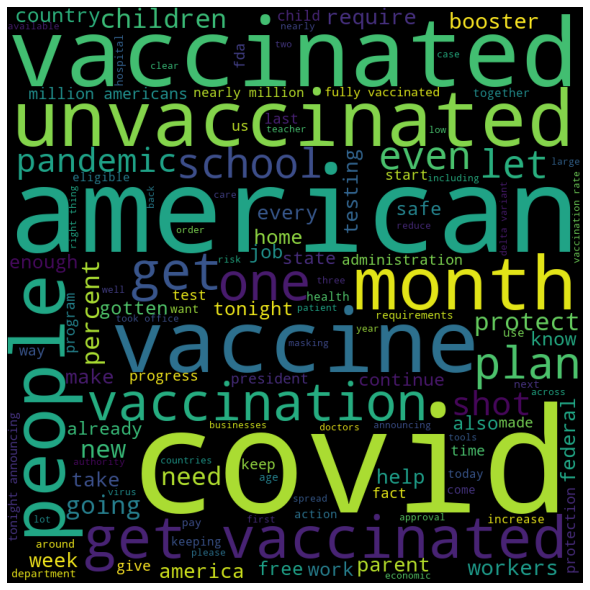

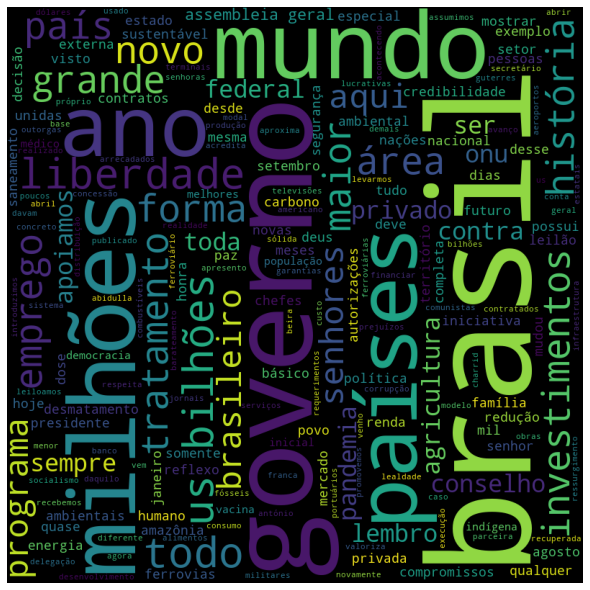

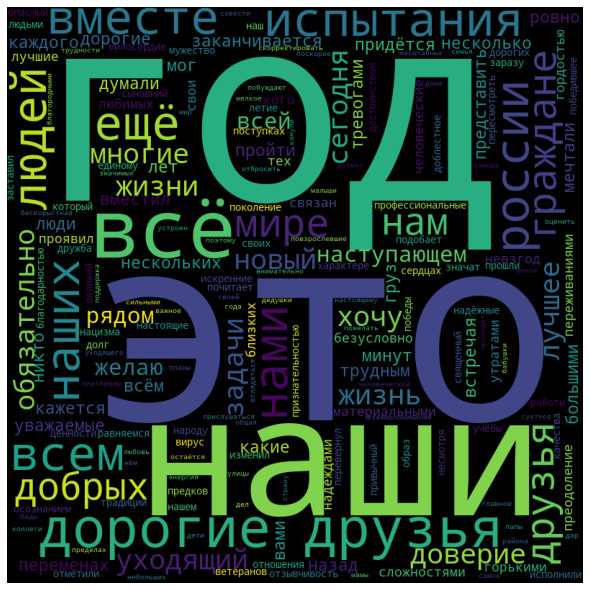

In [ ]:
### Generating the wordclouds
GenerateWordcloud(biden_str, 'english')
GenerateWordcloud(bolsonaro_str, 'portuguese')
GenerateWordcloud(putin_str, 'russian')

In [ ]:
### Comparing the lengths of each string before an after summarization
print(biden_str + '\nOriginal Text Length: ' + str(len(biden_str)))
summarized_biden_text = TextSummarizer(biden_str, 'english')
print(summarized_biden_text + '\nSummarized Text Length: ' + str(len(summarized_biden_text)))
print('-----------------------------')
print(bolsonaro_str + '\nOriginal Text Length: ' + str(len(bolsonaro_str)))
summarized_bolsonaro_text = TextSummarizer(bolsonaro_str, 'portuguese')
print(summarized_bolsonaro_text + '\nSummarized Text Length: ' + str(len(summarized_bolsonaro_text)))
print('-----------------------------')
print(putin_str + '\nOriginal Text Length: ' + str(len(putin_str)))
summarized_putin_text = TextSummarizer(putin_str, 'russian')
print(summarized_putin_text + '\nSummarized Text Length: ' + str(len(summarized_putin_text)))

Good evening, my fellow Americans. I want to talk to you about where we are in the battle against COVID-19, the progress we’ve made, and the work we have left to do.  And it starts with understanding this: Even as the Delta variant 19 [sic] has—COVID-19—has been hitting this country hard, we have the tools to combat the virus, if we can come together as a country and use those tools.  If we raise our vaccination rate, protect ourselves and others with masking and expanded testing, and identify people who are infected, we can and we will turn the tide on COVID-19.  It will take a lot of hard work, and it’s going to take some time. Many of us are frustrated with the nearly 80 million Americans who are still not vaccinated, even though the vaccine is safe, effective, and free.  You might be confused about what is true and what is false about COVID-19. So before I outline the new steps to fight COVID-19 that I’m going to be announcing tonight, let me give you some clear information about w

In [ ]:
### Creating tokens from the summarized texts
new_biden_tokens = GetTokens(summarized_biden_text, 'english')
print(new_biden_tokens)
new_bolsonaro_tokens = GetTokens(summarized_bolsonaro_text, 'portuguese')
print(new_bolsonaro_tokens)
new_putin_tokens = GetTokens(summarized_putin_text, 'russian')
print(new_putin_tokens)

['want', 'talk', 'battle', 'progress', 'made', 'work', 'left', 'start', 'understanding', 'even', 'delta', 'variant', 'sic', 'hitting', 'country', 'hard', 'tool', 'combat', 'virus', 'come', 'together', 'country', 'use', 'tool', 'take', 'lot', 'hard', 'work', 'going', 'take', 'time', 'many', 'u', 'frustrated', 'nearly', 'million', 'american', 'still', 'vaccinated', 'even', 'though', 'vaccine', 'safe', 'effective', 'free', 'outline', 'new', 'step', 'fight', 'going', 'announcing', 'tonight', 'let', 'give', 'clear', 'information', 'stand', 'became', 'president', 'million', 'american', 'fully', 'vaccinated', 'took', 'office', 'ordered', 'enough', 'vaccine', 'every', 'american', 'averaging', 'new', 'job', 'month', 'past', 'three', 'month', 'tough', 'stretch', 'could', 'last', 'vaccine', 'provide', 'strong', 'protection', 'vaccinated', 'read', 'hear', 'see', 'story', 'hospitalized', 'people', 'people', 'death', 'bed', 'among', 'unvaccinated', 'past', 'week', 'caused', 'fact', 'despite', 'ameri

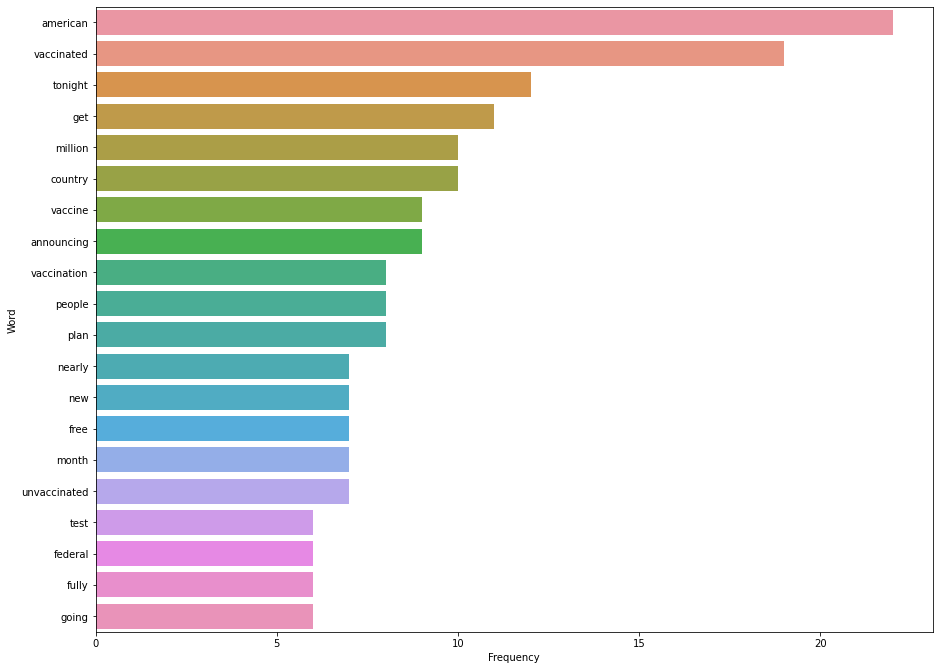

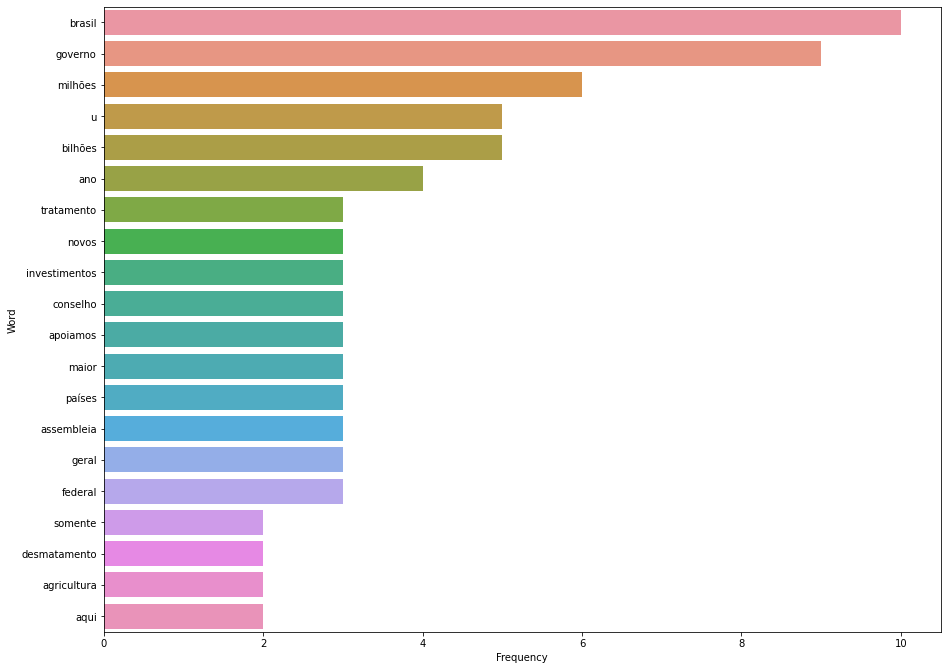

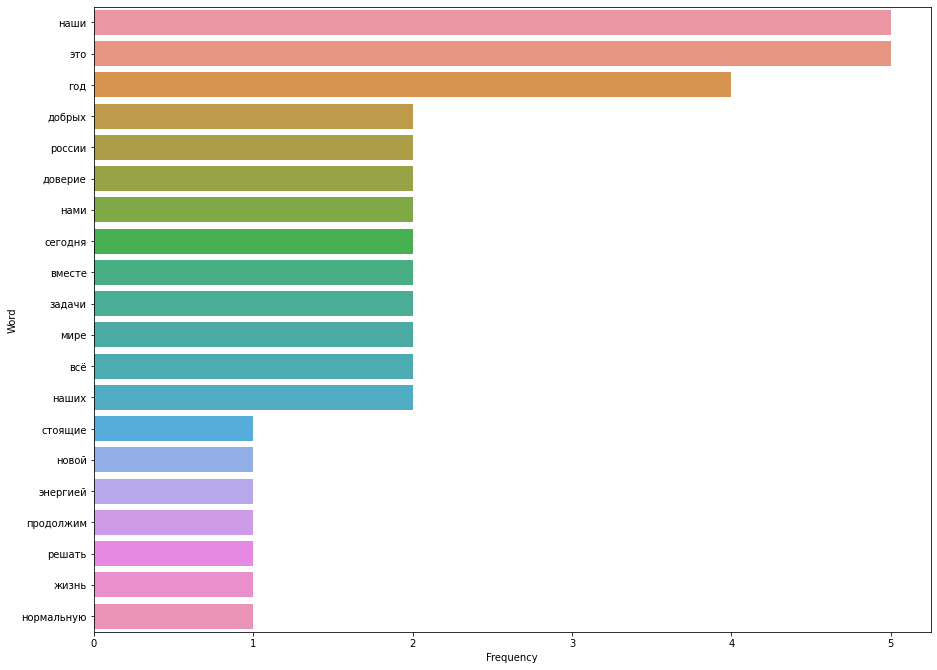

In [ ]:
### Forming word frequencies from the new tokens
new_biden_word_freqs = WordFrequency(new_biden_tokens)
WordFrequencyTable(new_biden_word_freqs[0])
new_bolsonaro_word_freqs = WordFrequency(new_bolsonaro_tokens)
WordFrequencyTable(new_bolsonaro_word_freqs[0])
new_putin_word_freqs = WordFrequency(new_putin_tokens)
WordFrequencyTable(new_putin_word_freqs[0])

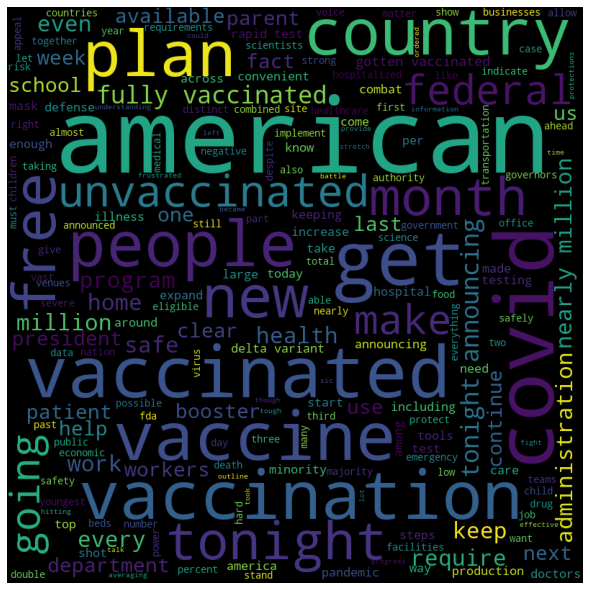

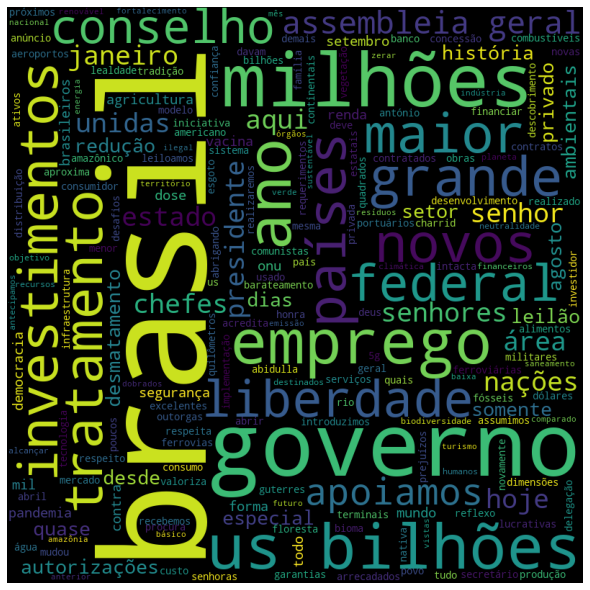

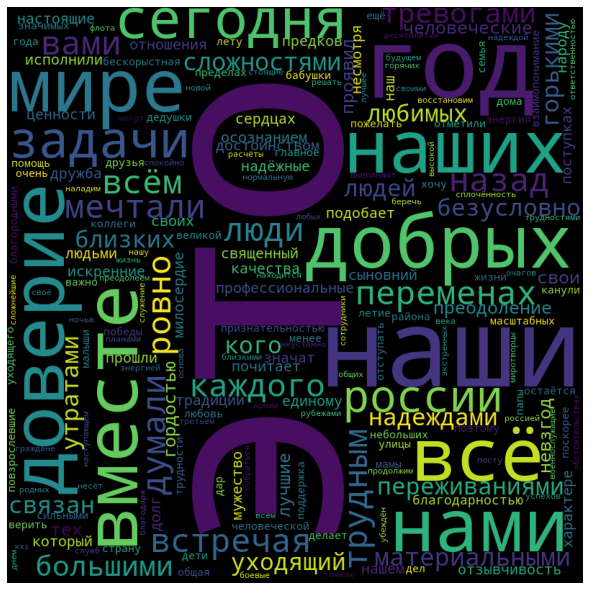

In [ ]:
### Generating new wordclouds from the summarized texts
GenerateWordcloud(summarized_biden_text, 'english')
GenerateWordcloud(summarized_bolsonaro_text, 'portuguese')
GenerateWordcloud(summarized_putin_text, 'russian')